In [1]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Hypothesis Testing: Is it a fair coin?

#### If you flip a coin 30 times and get 22 heads, is it a fair coin?

The probability of a single fair coin flip turning up heads is exactly 50% since there is an equal chance of either heads or tails turning up.  
  
$$P(H)=1/2$$

The probabilty of getting 2 heads in a row and then 1 tail. We would need to multiply the probability of getting heads, the probability of getting heads again, and the probability of getting tails (all three events are independent of one another)

$$P(HHT) = P(H) * P(H) * P(T)$$

The probability of getting 2 heads and 1 tails with 3 fair coin tosses. To get the actual probability of tossing 2 heads and 1 tails we will have to add the probabilities for all of the possible permutations, of which there are exactly three: HHT, HTH, and THH.

$$P(2H, 1T) = P(HHT) + P(HTH) + P(THH)$$

Alternatively, we could also use the binomial distribution:
  
$$P(N_H, N_T)= {n\choose k}p^k(1-p)^{n-k}$$

Where
- n is number of coin flips
- k is how many heads
- p is the probability of getting heads on each flip


#### Calculate probability of every possible outcome of tossing a fair coin 50 times

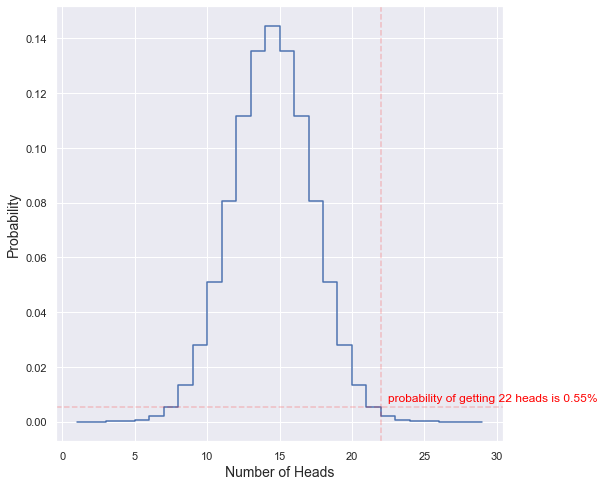

In [117]:
number_flips = 30
number_of_heads = np.arange(1,number_flips)
probability_head = 0.5 

prob = stats.binom(n = number_flips, p = probability_head).pmf(k = number_of_heads)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)

sns.lineplot(x=number_of_heads ,y=prob, drawstyle='steps-pre', ax=ax)
ax.set_xlabel("Number of Heads", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)


probability_22 = stats.binom(n = number_flips, p = probability_head).pmf(k = 22)

ax.axvline(22, alpha=0.2, color="red", ls="--")
ax.axhline(probability_22, alpha=0.2, color="red", ls="--")
ax.annotate(
    f"probability of getting 22 heads is {np.round(probability_22*100,2)}%", 
    xy=(22.5,probability_22+0.002),
    color="red",
)


plt.show()

#### Null vs Alternative hypothesis and the P-Value

In standard frequentist statistic's hypothesis testing, we start with a null hypothesis (which represents our status quo) and an alternative hypothesis (which represents what we’re testing for).

- **Null Hypothesis:** the coin is fair $P(H)=0.5$
- **Alternative Hypothesis:** the coin is not fair $P(H) \ne 0.5$

We then conduct a hypothesis test under the assumption that the null hypothesis is true. If the test results suggest that the data do not provide convincing evidence for the alternative hypothesis, we fail to reject the null hypothesis. If they do, we reject the null hypothesis in favor of the alternative.

We use a p-value to weigh the strength of the evidence (what the data is telling you about the population). p-value is defined as the probability of obtaining the observed or more extreme outcome, given that the null hypothesis is true (not the probability that the alternative hypthesis is true). It is a number between 0 and 1. We always compare it to level of confidence, typically $\alpha=0.05$. 


- **p-value smaller than our level of confidence** indicates strong evidence against the null hypothesis, thus we reject the null hypothesis. It is a very extreme value if the null is true.
- **p-value greater than our level of confidence** indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis. Although p-value is still in our favor, we cannot conclusively say that it was not due to random noise.
- **p-value very close to level of confidence**  are considered to be marginal (could go either way)

In [110]:
number_of_heads = 22
number_flips = 30
probability_head = 0.5 

number_of_heads_and_above = np.arange(number_of_heads, number_flips + 1)
pvalue = stats.binom(n = number_flips, p = probability_head).pmf(k = number_of_heads_and_above).sum()

print('P-value for 22 heads out of 30 flips: {:0.1f}%'.format(pvalue * 100))

P-value for 22 heads out of 30 flips: 0.8%


Above, we calculated the p-value of observing 35 heads out of 50 flips under the null hypothesis that the coin is fair. The value is 0.3% much smaller than our typical 5% confidence level. This indicates strong evidence against the null hypothesis, thus we reject the null hypothesis. The coin is unfair.

#### Do we get the same answer if we run a simulation?

Instead of using the above approach, we simulate 50 coin flips a time and calculate the proportion of the flips that resulted in at least 35 heads or more. We repeat this 100,000 times.

In [108]:
def flip_coin(flips=30):
    #1: heads, 0: tails
    flip_coin = np.random.randint(2, size = flips) 
    
    return flip_coin

def run_simulations(simulations=100000):
    heads_in_simulation = []
    for i in range(simulations):
        coin_flips = flip_coin()
        heads_in_simulation.append(coin_flips.sum())
    
    heads_22_above = np.sum([i>=22 for i in heads_in_simulation])
    proportion_22_above = np.round(heads_22_above/simulations * 100, 1)
    
    return f"Proportion of simulations with 22 heads and above in 30 flips: {proportion_22_above}%"
    
        

run_simulations()

'Proportion of simulations with 22 heads and above in 30 flips: 0.8%'